# Relatório 1

**Nome:** Thiago Lopes <br>
**Matrícula:** 20100358 <br>
**Turma:** T2

# Bibliotecas python utilizadas

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import sympy

# Funções para plotagem de gráficos

In [2]:
def plotFunction(func, x_range, num_points=1000, **kwargs):
    # Generate x values
    x_values = np.linspace(x_range[0], x_range[1], num_points)

    # Compute y values
    y_values = func(x_values)

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label=f'{func.__name__}(x)')

    # Set plot title and labels
    plt.title(kwargs.get('title', 'Function Plot'))
    plt.xlabel(kwargs.get('xlabel', 'x'))
    plt.ylabel(kwargs.get('ylabel', 'y'))

    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    # Add a grid
    plt.grid(True)

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()

In [3]:
def makeGraph(a, b, f, x_points, y_points, title, root_value=None):
    # Define the range for x values
    x = np.linspace(a, b, 400)

    # Evaluate the function at each x value
    y = f(x)

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot the function
    plt.plot(x, y, label='f(x)', color='blue')

    # Plot the points from the bisection method
    plt.scatter(x_points, y_points, color='red', zorder=5, label=title + " Points")

    # If a root value is given, highlight it
    if root_value is not None:
        plt.scatter(root_value[0], root_value[1], color='green', s=100, label='Approx. Root', zorder=10, marker='x', linewidths=3)

    # Adding titles and labels
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)

    # Adding a legend
    plt.legend()

    # Showing the grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Display the plot
    plt.show()

# Métodos implementados (Bissecção, Falsa Posição, Newton Raphson e Secante):

In [4]:
def bisection(f, a, b, precision, n, show_table, show_graph, check_precision):
    print("===========================- Bisection -===========================\n")

    # Checking if the initial points are valid
    if f(a) * f(b) >= 0:
        return False

    # Creating a table to store iteration results if requested
    table = PrettyTable()
    table.field_names = ["N", "A", "B", "X", "F(X)", "F(A)", "F(A) * F(X)"]

    # Initializing variables to store the x points and coordinates for graphing
    x_points = []
    x_coords = a
    y_coords = b

    x = a

    # Iterating through the process for a maximum of n times
    for i in range(0, n):
        # Checking if the interval is already small enough
        if check_precision and abs(b - a) < precision:
            break

        # Calculating the midpoint of the interval
        x = (a + b) / 2

        # Storing the current midpoint in the list of x points
        x_points.append(x)

        # Adding the current iteration values to the table
        table.add_row([i+1, a, b, x, f(x), f(a), f(a)*f(x)])

        # Updating the interval boundaries based on the sign of the function
        if f(a) * f(x) > 0:
            a = x
        else:
            b = x

    # Printing the table if requested
    if show_table:
        print(table)

    # Creating a graph of the iterations if requested
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, y_coords, f, x_points, y_points, 'Bisection', root_value=(x_points[-1], y_points[-1]))

    # Printing the final root approximation
    print(f"ROOT: {x}\n\n")

    # Returning the final root approximation
    return x

In [5]:
def falsePosition(f, a, b, precision, n, show_table, show_graph, check_precision):
    print("===========================- False Position -===========================\n")

    # Checking if the initial points are valid
    if (f(a) * f(b)) >= 0:
        return False

    # Creating a table to store iteration results if requested
    table = PrettyTable()
    table.field_names = ["N", "A", "B", "X", "F(X)"]

    # Initializing variables to store the x points and coordinates for graphing
    x_points = []
    x_coords = a
    y_coords = b

    x = a

    # Iterating through the process for a maximum of n times
    for i in range(0, n):
        # Checking if the interval is already small enough
        if check_precision and abs(b - a) < precision:
            break

        # Calculating the next approximation using false position method
        x = ((a * f(b)) - (b * f(a))) / (f(b) - f(a))

        # Storing the current approximation in the list of x points
        x_points.append(x)

        # Adding the current iteration values to the table
        table.add_row([i+1, a, b, x, f(x)])

        # Updating the interval boundaries based on the sign of the function
        if f(a) * f(x) > 0:
            a = x
        else:
            b = x

    # Printing the table if requested
    if show_table:
        print(table)

    # Creating a graph of the iterations if requested
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, y_coords, f, x_points, y_points, 'False Position', root_value=(x_points[-1], y_points[-1]))

    # Printing the final root approximation
    print(f"ROOT: {x}\n\n")

    # Returning the final root approximation
    return x

In [6]:
def newtonRaphson(f, x, precision, n, show_table, show_graph, check_precision):
    print("===========================- Newton Raphson -===========================\n")

    # Checking if the initial point is already close enough to the root
    if abs(f(x)) < precision:
        return x

    # Creating a table to store iteration results if requested
    table = PrettyTable()
    table.field_names = ['N', 'X^n', 'F(X^n)']

    # Storing the initial x point in the list of x points
    x_points = []
    x_points.append(x)

    # Storing the initial x coordinate for graphing purposes
    x_coords = x

    # Defining the symbol for the variable x
    x_symbol = sympy.symbols('x_symbol')

    # Defining a function to calculate the derivative of f(x)
    def derivative(x):
        return sympy.diff(f(x_symbol), x_symbol).subs(x_symbol, x)

    # Initializing the step size h using the first iteration
    h = (f(x) / derivative(x))

    # Iterating through the process for a maximum of n times
    for i in range(0, n):
        # Storing the current point in the list of x points
        x_points.append(x)

        table.add_row([i+1, x, f(x)])

        # Checking if the step size is already small enough
        if check_precision and abs(h) < precision:
            break

        # Adding the current iteration values to the table

        # Calculating the step size using the current point
        h = (f(x) / derivative(x))

        # Updating the current point using the step size
        x = x - h

    # Printing the table if requested
    if show_table:
        print(table)

    # Creating a graph of the iterations if requested
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, float(h), f, x_points, y_points, 'Newton Raphson', root_value=(x_points[-1], y_points[-1]))

    # Printing the final root approximation
    print(f"ROOT: {x_points[-1]}\n\n")

    # Returning the final root approximation
    return x_points[-1]

In [7]:
def secant(f, x1, x2, precision, n, show_table, show_graph, check_precision):
    print("===========================- Secant -===========================\n")

    # Checking if the initial points are valid
    if ((f(x1) * f(x2)) >= 0):
        return False

    # Creating a table to store iteration results if requested
    table = PrettyTable()
    table.field_names = ['N', 'X^n', 'F(X^n)']

    # Storing the initial x1 point in the list of x points
    x_points = []
    x_points.append(x1)

    # Initializing variables for coordinates in the graph
    x_coords = x1
    y_coords = x2

    xm = 0
    x = 0
    c = 0

    # Iterating through the process for a maximum of n times
    for i in range(0, n):
        # Adding the current iteration values to the table
        table.add_row([i+1, x, f(x)])

        # Calculating the next approximation using the secant method
        x = ((x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1)))

        # Checking if the function value at the new point is zero
        c = f(x1) * f(x)

        # Updating the previous points for the next iteration
        x1 = x2
        x2 = x

        # Checking if the function value is already zero at the new point
        if (c == 0):
            break

        # Calculating the midpoint between the current and previous approximations
        xm = ((x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1)))

        # Storing the midpoint in the list of x points
        x_points.append(xm)

        # Checking if the precision condition is met
        if check_precision and abs(xm - x) < precision:
            break

    # Adding the final iteration values to the table
    table.add_row([i+2, x, f(x)])

    # Printing the table if requested
    if show_table:
        print(table)

    # Creating a graph of the iterations if requested
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, y_coords, f, x_points, y_points, 'Secant', root_value=(x_points[-1], y_points[-1]))

    # Printing the final root approximation
    print(f"ROOT: {x}\n\n")

    # Returning the final root approximation
    return x

# Exercícios

## Exercício 1

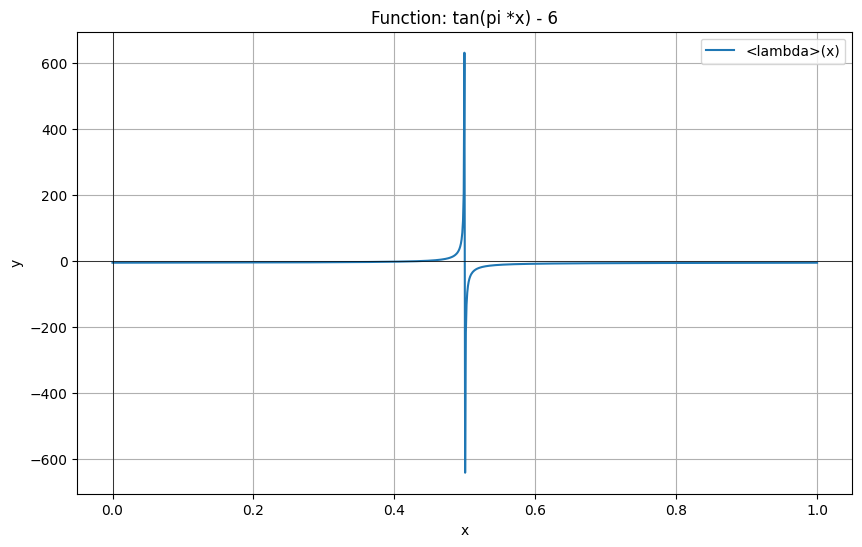

===========================- Bisection -===========================

+----+---------------------+---------------------+---------------------+-----------------------+-----------------------+------------------------+
| N  |          A          |          B          |          X          |          F(X)         |          F(A)         |      F(A) * F(X)       |
+----+---------------------+---------------------+---------------------+-----------------------+-----------------------+------------------------+
| 1  |          0          |         0.48        |         0.24        |   -5.060937494182507  |          -6.0         |   30.365624965095044   |
| 2  |         0.24        |         0.48        |         0.36        |   -3.874891826842797  |   -5.060937494182507  |   19.610585332370064   |
| 3  |         0.36        |         0.48        |         0.42        |   -2.105257145070144  |   -3.874891826842797  |   8.157643704834701    |
| 4  |         0.42        |         0.48        | 0.44

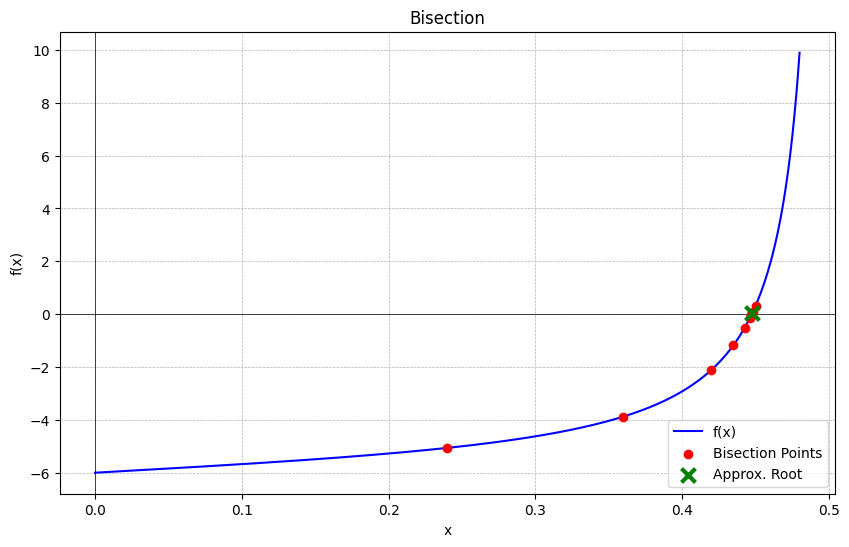

ROOT: 0.44765625


===========================- False Position -===========================

+----+---------------------+------+---------------------+----------------------+
| N  |          A          |  B   |          X          |         F(X)         |
+----+---------------------+------+---------------------+----------------------+
| 1  |          0          | 0.48 | 0.18119424169051174 |  -5.360105281561882  |
| 2  | 0.18119424169051174 | 0.48 |  0.2861871658222898 | -4.7422109536614165  |
| 3  |  0.2861871658222898 | 0.48 |  0.3489812274239058 |  -4.052821259004907  |
| 4  |  0.3489812274239058 | 0.48 | 0.38705262118447054 | -3.3010690668052756  |
| 5  | 0.38705262118447054 | 0.48 | 0.41030471988375605 |  -2.545637755326749  |
| 6  | 0.41030471988375605 | 0.48 |  0.4245664829260049 | -1.8595503852593884  |
| 7  |  0.4245664829260049 | 0.48 |  0.4333363130168665 | -1.2951533289872295  |
| 8  |  0.4333363130168665 | 0.48 |  0.4387374086143911 | -0.8684850457776232  |
| 9  |  0.438737

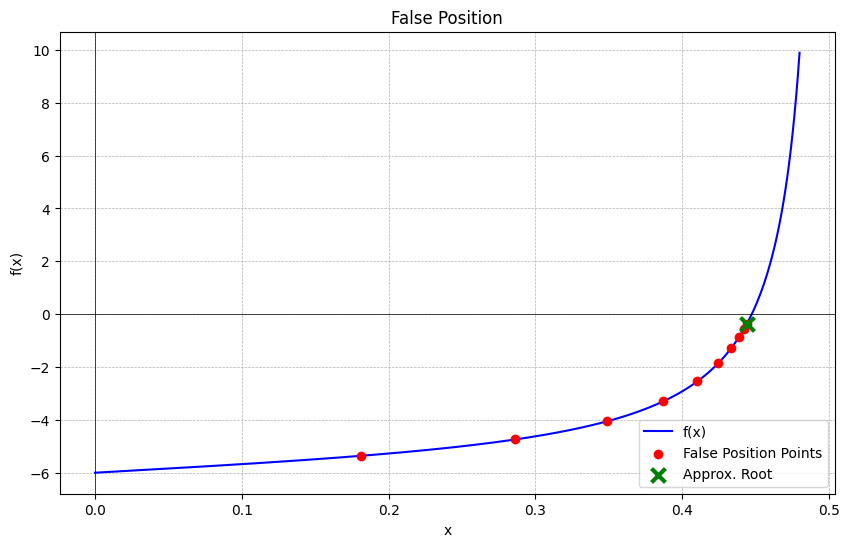

ROOT: 0.44412066175818793


===========================- Secant -===========================

+----+---------------------+---------------------+
| N  |         X^n         |        F(X^n)       |
+----+---------------------+---------------------+
| 1  |          0          |         -6.0        |
| 2  | 0.18119424169051174 |  -5.360105281561882 |
| 3  |  0.2861871658222898 | -4.7422109536614165 |
| 4  |  1.0919861065027499 |  -5.702694576330455 |
| 5  | -3.6922966654011087 |  -4.551142530386834 |
| 6  | -22.600649854740755 | -2.9435626868163327 |
| 7  |  -57.22283247284714 |  -6.842371907062933 |
| 8  |  3.5387581372083754 |  -14.17209646560696 |
| 9  | -113.94439101136987 |  -5.823499930088487 |
| 10 |  -195.8938669433544 |  -5.653641739786947 |
| 11 |  -2923.539657000567 |  1.9850031702410753 |
+----+---------------------+---------------------+


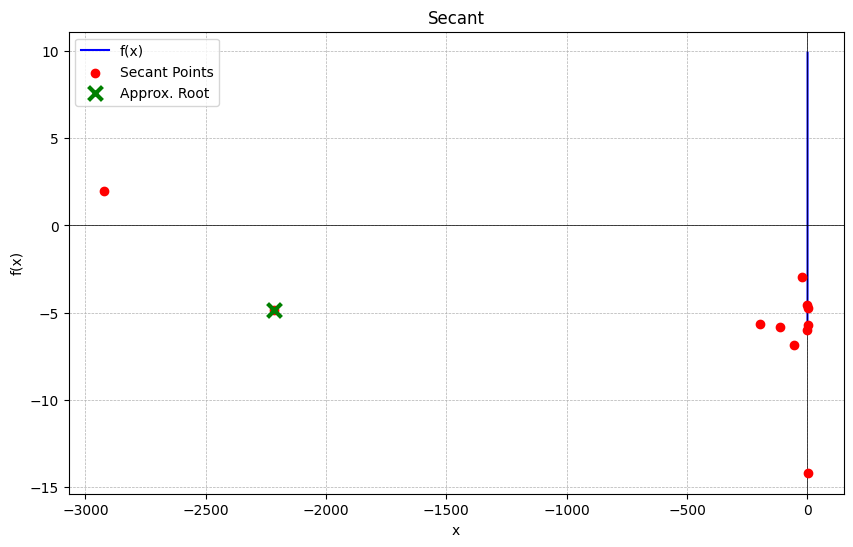

ROOT: -2923.539657000567




-2923.539657000567

In [8]:
fx = lambda x: np.tan(np.pi *x) - 6

plotFunction(fx, (0, 1), title='Function: tan(pi *x) - 6')

a = 0
b = 0.48
precision = 0.000001
n = 10

bisection(fx, a, b, precision, n, True, True, False)
falsePosition(fx, a, b, precision, n, True, True, False)
secant(fx, a, b, precision, n, True, True, False)

Para comparar a eficiência dos métodos de Bissecção e Falsa Posição, vamos calcular o erro relativo percentual para cada iteração, usando a raiz conhecida ( x ≈ 0,447431543 ).

O erro relativo percentual é dado por:
Erro Relativo Percentual = |(x verdadeiro − x aproximado) / x verdadeiro| * 100%
​
Método da Bissecção:
Na 10ª iteração, ( x_2 = 0.447656 )
Erro Relativo Percentual = |(0.447431543 - 0.447656) / 0.447431543| * 100% ≈ 0.0502%

Método da Falsa Posição:
Na 10ª iteração, ( x_2 = 0.444121 )
Erro Relativo Percentual = |(0.447431543 - 0.444121) / 0.447431543| * 100% ≈ 0.7398%

Método da Bissecção:
O método da Bissecção alcançou x_2 = 0.447656 O erro relativo percentual é aproximadamente 0,0502% Este método demonstra convergência garantida, porém o processo é caracterizado pela divisão progressiva do intervalo, o que pode ser mais lento.

Método da Falsa Posição:
Ja o método da Falsa Posição resultou em x_2 = 0,444121, com um erro relativo percentual de cerca de 0,7398%. Embora possa ser mais rápido em alguns cenários, não se aproximou tanto da raiz quanto o método da Bissecção para esta função específica.

Método da Secante:
Este método não convergiu dentro das 10 iterações dadas. Isso pode indicar que, para essa função e valores iniciais, o método da Secante não é adequado ou requer mais iterações para alcançar uma boa aproximação.

Conclusão:
Com base nos resultados obtidos, o Método da Bissecção demonstrou maior eficiência para este problema particular, oferecendo uma aproximação mais próxima da raiz real dentro das 10 iterações consideradas. No entanto, é essencial considerar que a eficácia dos métodos pode variar dependendo da função e das condições iniciais escolhidas.

## Exercício 2

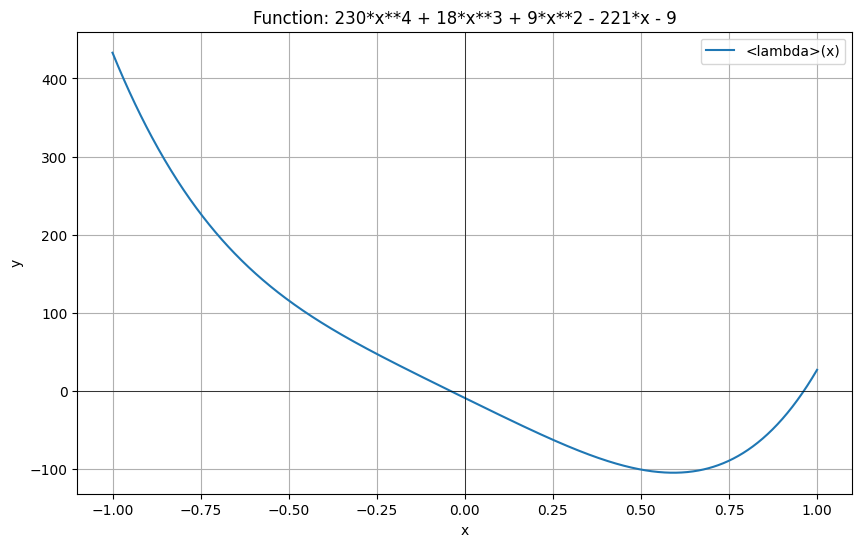

===========================- False Position -===========================

+----+--------------------+---+--------------------+-------------------------+
| N  |         A          | B |         X          |           F(X)          |
+----+--------------------+---+--------------------+-------------------------+
| 1  |         0          | 1 |        0.25        |       -62.5078125       |
| 2  |        0.25        | 1 | 0.7737627651217597 |    -83.83052027901041   |
| 3  | 0.7737627651217597 | 1 | 0.9448851694791753 |   -11.265130249920787   |
| 4  | 0.9448851694791753 | 1 | 0.9611107968444627 |   -0.8558678232400325   |
| 5  | 0.9611107968444627 | 1 | 0.9623056624240767 |   -0.06180236926138605  |
| 6  | 0.9623056624240767 | 1 | 0.962391746837012  |  -0.004446180831450874  |
| 7  | 0.962391746837012  | 1 | 0.9623979388949122 |  -0.0003197810401047718 |
| 8  | 0.9623979388949122 | 1 | 0.9623983842387566 |  -2.29990515379086e-05  |
| 9  | 0.9623983842387566 | 1 | 0.9623984162684144 | -1.6

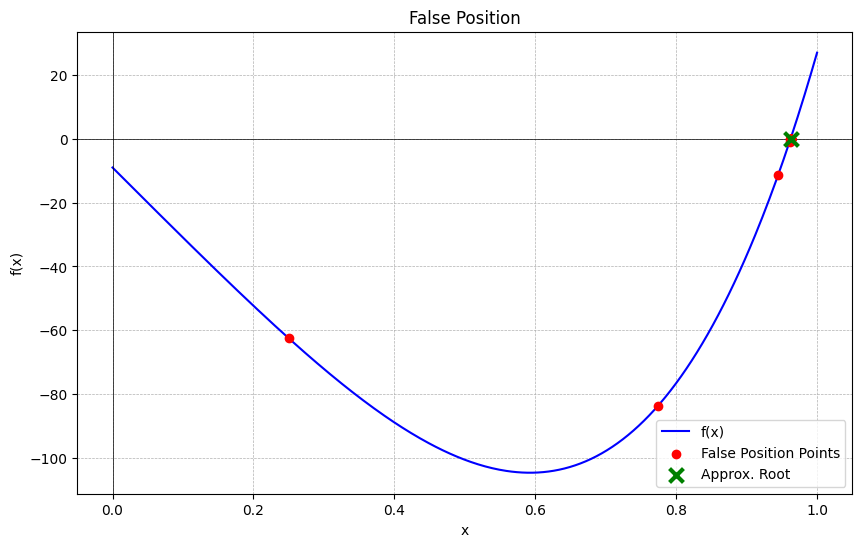

ROOT: 0.9623984187505414


===========================- Secant -===========================

+----+----------------------+-------------------------+
| N  |         X^n          |          F(X^n)         |
+----+----------------------+-------------------------+
| 1  |          0           |            -9           |
| 2  |         0.25         |       -62.5078125       |
| 3  |  0.7737627651217597  |    -83.83052027901041   |
| 4  |  -1.285417783520922  |    879.6389856119229    |
| 5  |  0.594595520402885   |   -104.69138947868024   |
| 6  | 0.39464110468339525  |    -88.12894036243684   |
| 7  |  -0.669318135551583  |    183.71315974038484   |
| 8  | 0.049714397616071736 |   -19.961021581616663   |
| 9  | -0.02075415082381656 |    -4.409574294107096   |
| 10 | -0.04073533289637811 |   0.016859473350379517  |
| 11 | -0.04065922824320605 | -1.3318351362201497e-05 |
+----+----------------------+-------------------------+


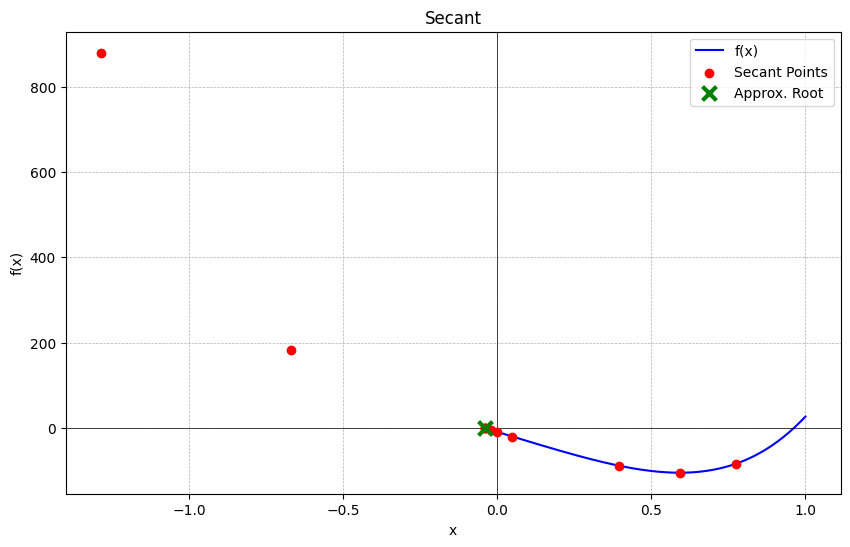

ROOT: -0.04065922824320605


===========================- False Position -===========================

+-----+----+-----------------------+-----------------------+-------------------------+
|  N  | A  |           B           |           X           |           F(X)          |
+-----+----+-----------------------+-----------------------+-------------------------+
|  1  | -1 |           0           | -0.020361990950226245 |    -4.496380927836867   |
|  2  | -1 | -0.020361990950226245 |  -0.03043024717381782 |   -2.2668913669716844   |
|  3  | -1 |  -0.03043024717381782 | -0.035479814108385084 |   -1.1480711911986026   |
|  4  | -1 | -0.035479814108385084 | -0.038030413574860686 |   -0.5827707397035979   |
|  5  | -1 | -0.038030413574860686 |   -0.039323379451934  |   -0.2961607507816968   |
|  6  | -1 |   -0.039323379451934  | -0.039980008185285694 |   -0.15059523136762643  |
|  7  | -1 | -0.039980008185285694 | -0.040313782245339005 |   -0.07659914440805338  |
|  8  | -1 | -0.04031378224

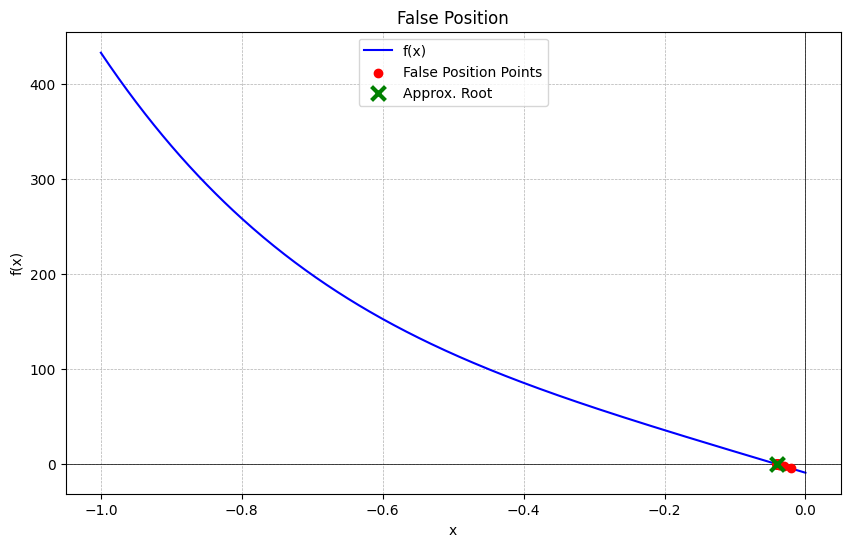

ROOT: -0.04065928831575886


===========================- Secant -===========================

+---+-----------------------+------------------------+
| N |          X^n          |         F(X^n)         |
+---+-----------------------+------------------------+
| 1 |           0           |           -9           |
| 2 | -0.020361990950226245 |   -4.496380927836867   |
| 3 |  -0.04069125643524189 |  0.007087483162253605  |
| 4 |  -0.04065926257769109 | -5.706243772607422e-06 |
+---+-----------------------+------------------------+


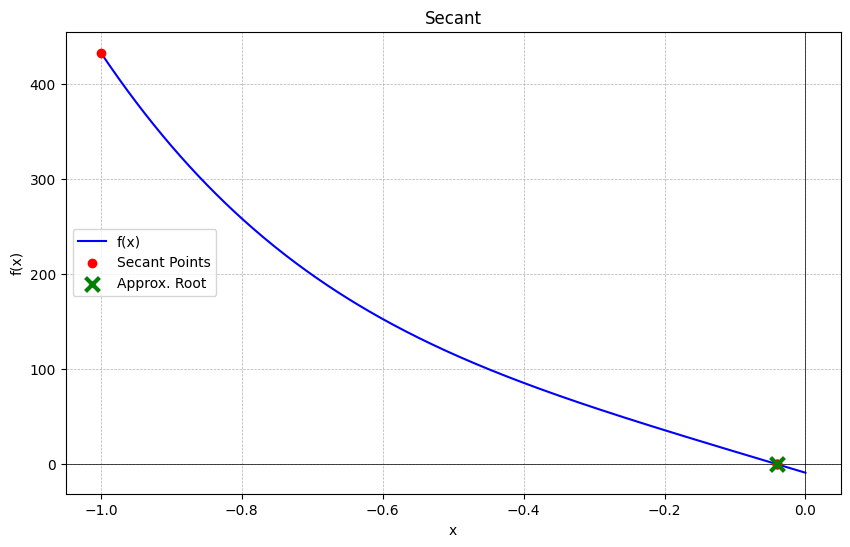

ROOT: -0.04065926257769109


===========================- Newton Raphson -===========================

+---+---------------------+----------------------+
| N |         X^n         |        F(X^n)        |
+---+---------------------+----------------------+
| 1 |         0.5         |       -100.625       |
| 2 |  -0.705089820359281 |   201.836303519466   |
| 3 |  -0.323791114230475 |   65.4184266869419   |
| 4 | -0.0646031310305749 |   5.31400706996668   |
| 5 | -0.0406861511519556 | 0.00595561648525766  |
| 6 | -0.0406592883453349 | 6.55714771369276e-9  |
| 7 | -0.0406592883157589 | 1.77635683940025e-15 |
+---+---------------------+----------------------+
ROOT: -0.0406592883157589


===========================- Newton Raphson -===========================

+---+---------------------+----------------------+
| N |         X^n         |        F(X^n)        |
+---+---------------------+----------------------+
| 1 |         -0.5        |       115.875        |
| 2 |  -0.150452488687783 |   

-0.0406592883157590

In [9]:
fx = lambda x: 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9

plotFunction(fx, (-1, 1), title='Function: 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9')

# intervalo = [0, 1]
falsePosition(fx, 0, 1, 0.000001, 100, True, True, True)
secant(fx, 0, 1, 0.000001, 100, True, True, True)

# intervalo = [-1, 0]
falsePosition(fx, -1, 0, 0.000001, 100, True, True, True)
secant(fx, -1, 0, 0.000001, 100, True, True, True)

newtonRaphson(fx, 0.5, 0.000001, 100, True, False, True)
newtonRaphson(fx, -0.5, 0.000001, 100, True, False, True)

Analise da convergência no intervalo [0,1]:

Falsa Posição:
Este método é garantido de convergir para uma raiz dentro do intervalo inicial fornecido, pois a raiz está sempre entre x0 e x1. No exemplo, a raiz encontrada é x ≈ 0.962398, dentro do intervalo [0,1].
Convergiu de forma estável e eficiente, atingindo a precisão de 10^−6 em 10 iterações.

Secante:
O método da secante ão garante que as aproximações subsequentes permanecerão no intervalo original. Assim, pode divergir do intervalo e encontrar uma raiz fora dele. No exemplo, a raiz encontrada é x ≈ −0.040659.
Esta abordagem teve dificuldades, especialmente porque a função não é linear e apresenta variações significativas, resultando em passos fora do intervalo inicial e um número maior de iterações para atingir uma raiz.

Conclusão
O Método da Falsa Posição encontrou uma raiz dentro do intervalo estipulado [0,1] e convergiu de forma estável e eficiente. Já o Método da Secante, embora poderoso, pode divergir do intervalo inicial dependendo da função e dos valores iniciais escolhidos, resultando em raízes fora do intervalo original. Isso destaca a importância de escolher o método apropriado para o problema específico e a configuração inicial.



Analise da convergência no intervalo [-1,0]:

Falsa Posição:
Converge de forma estável, mas pode exigir mais iterações dependendo da função. Neste exercicio, levou 24 iterações para alcançar a precisão de 10^−6.

Secante:
Converge rapidamente, exigindo menos iterações em comparação com a Falsa Posição, encontrando a raiz em apenas 4 iterações.

Conclusão
Para o intervalo [−1,0], ambos os métodos encontraram a raiz em x ≈ −0.040659 com precisão de 10^−6. O método da Secante foi mais eficiente, alcançando a solução em apenas 4 iterações, enquanto o método da Falsa Posição exigiu 24 iterações. Isso destaca a rapidez do método da Secante em convergir, embora dependa das aproximações iniciais escolhidas e possa ser menos estável em alguns casos.
O método da Falsa Posição, embora mais lento, é geralmente mais estável e garante a convergência dentro do intervalo especificado.

## Exercício 3

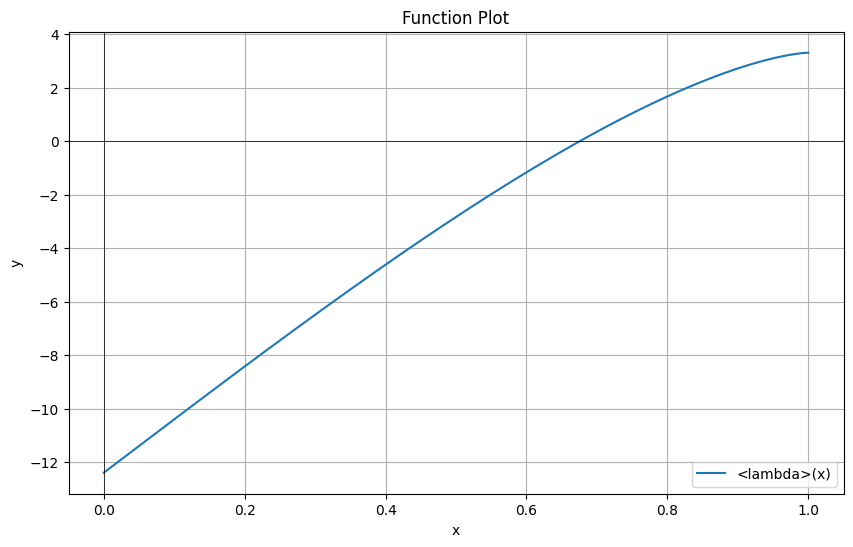

===========================- Bisection -===========================

+---+----------+--------+-----------+----------------------+----------------------+------------------------+
| N |    A     |   B    |     X     |         F(X)         |         F(A)         |      F(A) * F(X)       |
+---+----------+--------+-----------+----------------------+----------------------+------------------------+
| 1 |    0     |   1    |    0.5    | -2.8338852250948197  |        -12.4         |   35.14017679117576    |
| 2 |   0.5    |   1    |    0.75   |  1.0414044980609152  | -2.8338852250948197  |  -2.9512208204021144   |
| 3 |   0.5    |  0.75  |   0.625   | -0.7697799843809374  | -2.8338852250948197  |   2.1814681243108596   |
| 4 |  0.625   |  0.75  |   0.6875  | 0.17292524898285855  | -0.7697799843809374  |  -0.13311439546109458  |
| 5 |  0.625   | 0.6875 |  0.65625  | -0.2899274871894679  | -0.7697799843809374  |  0.22318037656031306   |
| 6 | 0.65625  | 0.6875 |  0.671875 | -0.05628601011208545 

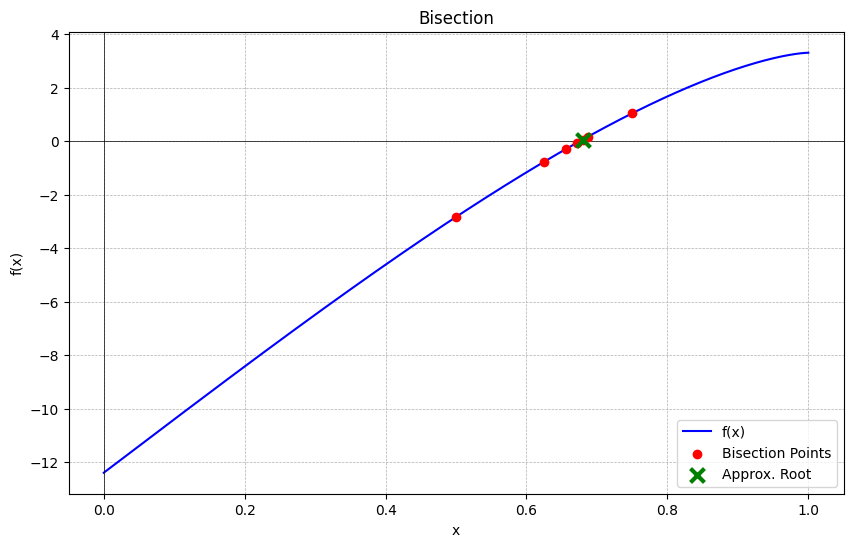

ROOT: 0.6796875




0.6796875

In [10]:
V = 12.4
L = 10
r = 1

volume_lambda = lambda h: L * (0.5 * np.pi * r**2 - r**2 * np.arccos(h / r) + h * np.sqrt(r**2 - h**2))
fx = lambda h: volume_lambda(h) - V

plotFunction(fx, (0,1))

a = 0
b = r
precision = 0.01
n = 100

bisection(fx, a, b, precision, n, True, True, True)

Inicialização dos Intervalos (A e B):
    O intervalo inicial [A, B] foi escolhido como [0, 1], baseado na condição de que a profundidade h da água na gamela está entre 0 e o raio r da semicircunferência (que é 1 pé).

Resultados Finais:
    A profundidade da água foi aproximada como h ≈ 0,6796875 pés com base nos resultados finais utilizando o método da bissecção. O valor da função F(X) próximo de zero indica que encontramos uma solução próxima à profundidade real da água na gamela.

Conclusao:
    O Método da Bissecção foi eficiente neste problema, pois mesmo com um número relativamente pequeno de iterações, conseguiu encontrar a solução com a precisão desejada. Comparado a métodos como a Falsa Posição ou a Secante, a bissecção é mais conservadora em termos de ajuste do intervalo, garantindo convergência mesmo em casos mais complexos.

## Exercício 4

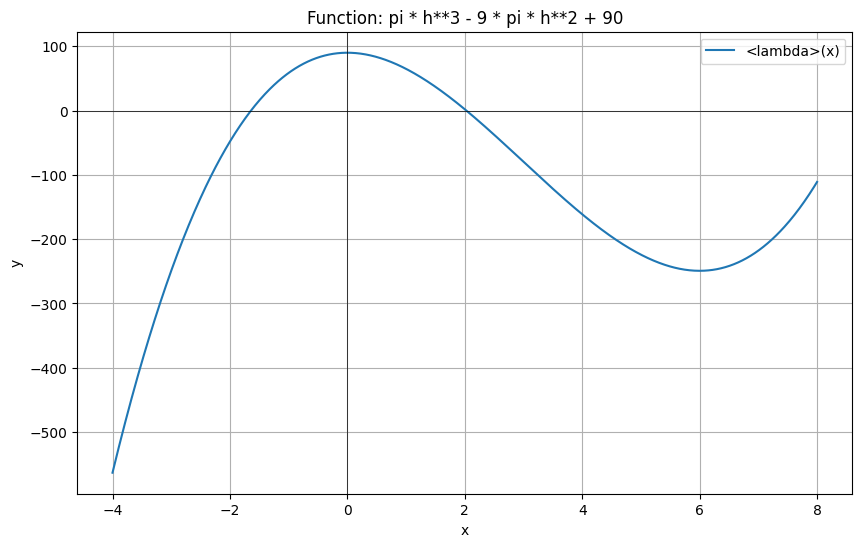

===========================- Newton Raphson -===========================

+---+------------------+----------------------+
| N |       X^n        |        F(X^n)        |
+---+------------------+----------------------+
| 1 |        2         |  2.0354056994857928  |
| 2 | 2.02699540652255 | -0.00680652112365010 |
| 3 | 2.02690572928171 | -7.37503000891593e-8 |
+---+------------------+----------------------+


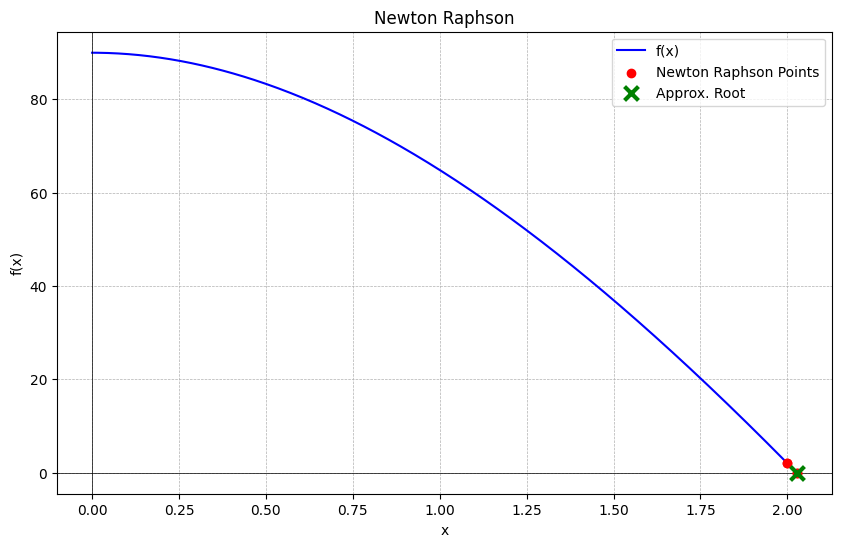

ROOT: 2.02690572928171




2.02690572928171

In [11]:
r = 3
fx = lambda h: math.pi * h**3 - 9 * math.pi * h**2 + 90

plotFunction(fx, (-4, 8), title='Function: pi * h**3 - 9 * pi * h**2 + 90')

a = 2
precision = 0.000001
n = 3

newtonRaphson(fx, a, precision, n, True , True, False)

Intervalo Utilizado:
    Identificamos a presença de três raízes no grafico da funcao fornecida no exercicio. foi escolhido o valor medio das raizes do intervalo entre 0 e 5.

Resultado Final:
    Resultado aproximado obtido utilizando o metodo newton Raphson foi ≈ 2.02690572928171
    Sendo assim, segundo o método de newton Raphson com um limite de 3 iterações, temos que a profundidade em que o tanque deve ser enchido para conter 30m^3 é de 2.0269.

Conclusao:
    Os resultados mostram uma rápida convergência do método de Newton-Raphson. A cada iteração, o valor de h se aproxima mais da raiz verdadeira da função f(h) = 0.
    O método de Newton-Raphson mostrou-se eficiente para encontrar a profundidade necessária para que o tanque armazene 30m^3 de água. Em apenas três iterações, a solução foi encontrada com uma precisão muito alta.

    

## Exercício 5

### Exercício 5 - A

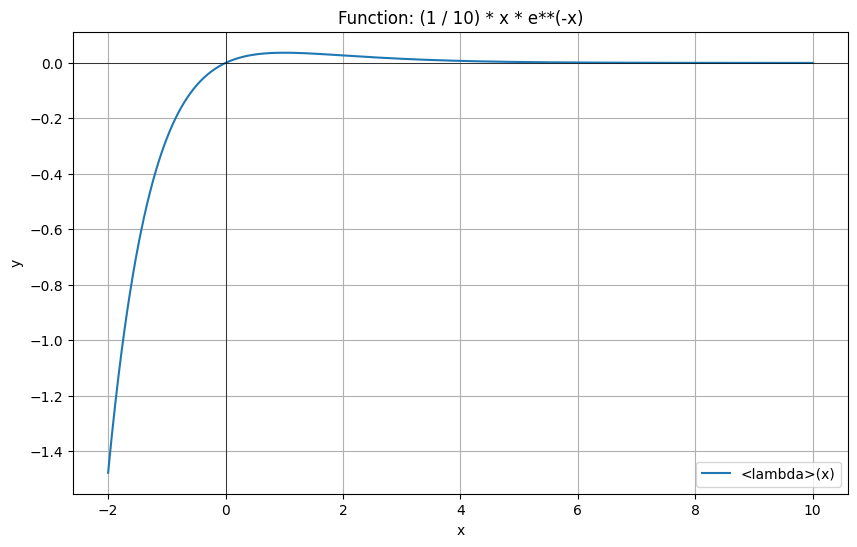

===========================- Newton Raphson -===========================



TypeError: loop of ufunc does not support argument 0 of type Mul which has no callable exp method

In [12]:
x = 2
fx =  lambda x: (1 / 10) * x * np.exp(-x)

plotFunction(fx, (-2, 10), title='Function: (1 / 10) * x * e**(-x)')

precision = 0.000001
n = 100

newtonRaphson(fx, x, precision, n, True, True, True)

No caso da função ( f(x) = (1 / 10) * x * e^(-x) ), começando com uma estimativa inicial de x = 2, o gráfico revela que a função nunca toca o eixo X. Isso indica que não existe raiz real para essa função, pois ela sempre permanece acima do eixo X. O Método de Newton-Raphson é projetado para encontrar raízes reais de funções, mas quando uma função não possui raiz ou quando a raiz está muito distante da estimativa inicial fornecida, o método pode falhar em convergir.

Além disso, se a derivada da função se aproximar de zero perto de uma estimativa inicial, isso pode resultar em passos de iteração que não se aproximam da raiz, levando a divergência. Portanto, é crucial escolher estimativas iniciais próximas o suficiente de uma raiz real e garantir que a função tenha uma derivada contínua e bem comportada nas proximidades da raiz para que o Método de Newton-Raphson seja eficaz.

### Exercício 5 - B



In [ ]:
x =-3
fx = lambda x: x**3 - x - 3

plotFunction(fx, (-4,4), title='Function: x**3 - x - 3')

precision = 0.000001
n = 100

newtonRaphson(fx, x, precision, n, True, True, True)

Para a função dada ( f(x) = x^3 - x - 3 ), começando com uma estimativa inicial de x = -3, o método pode não convergir se a derivada ( f’(x) ) for muito pequena ou se o próximo ponto estimado ( x_{n+1} ) estiver muito longe da raiz real, fazendo com que as iterações subsequentes se afastem ainda mais da raiz.

Distância da Raiz: No ponto x = -3, o valor da função está muito abaixo do eixo x, indicando que está longe de qualquer raiz real.
Tangente: A linha tangente à curva nesse ponto inicial não cortará o eixo x próximo de uma raiz real, levando a estimativas subsequentes que não convergem para uma solução.

Portanto, a escolha de x = -3 como ponto inicial não é adequada para essa função, pois as propriedades do método requerem um ponto mais próximo da raiz para garantir a convergência. É por isso que, visualmente, podemos ver no gráfico que a curva não toca o eixo x em x = -3, sinalizando que não é um bom candidato para iniciar o método.